

## The Data

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

### Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column is the label.

### Data Overview


<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

## Loading the Data Description and putting it in a function for easy access

In [2]:
import pandas as pd

In [3]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [4]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [5]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [6]:
feat_info('mort_acc')

Number of mortgage accounts.


## Loading the data and other imports

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [8]:
df = pd.read_csv('lending_club_loan_two.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  



-----
------

# Exploratory Data Analysis

**OVERALL GOAL: Get an understanding for which variables are important, view summary statistics, and visualize the data**


----

<Axes: xlabel='loan_status', ylabel='count'>

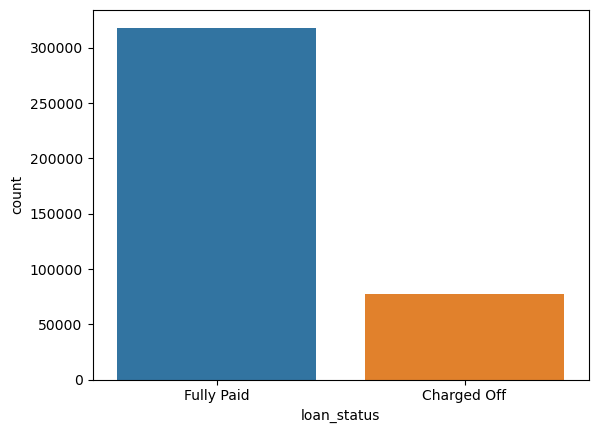

In [10]:
sns.countplot(df,x='loan_status')

<Axes: xlabel='loan_amnt', ylabel='Count'>

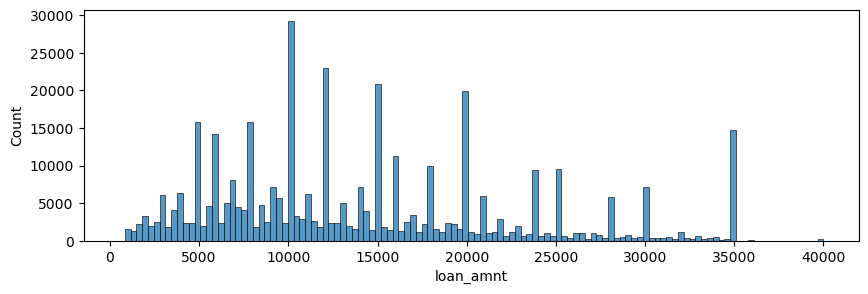

In [11]:
# Creating a histogram of the loan_amnt column.
plt.figure(figsize=(10,3))
sns.histplot(df, x='loan_amnt')

**TASK: Let's explore correlation between the continuous feature variables. Calculate the correlation between all continuous numeric variables using .corr() method.**

In [12]:
#Creating a list of all the column names that have a numeric value and assigning it to a variable y
y=[c for c in df.columns if isinstance(df[c][0], float) or isinstance(df[c][0], int)]


In [13]:
#Getting the correlation between all the columns with numeric values
df[y].corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Visualizing the correlation using a heatmap.**


<Axes: >

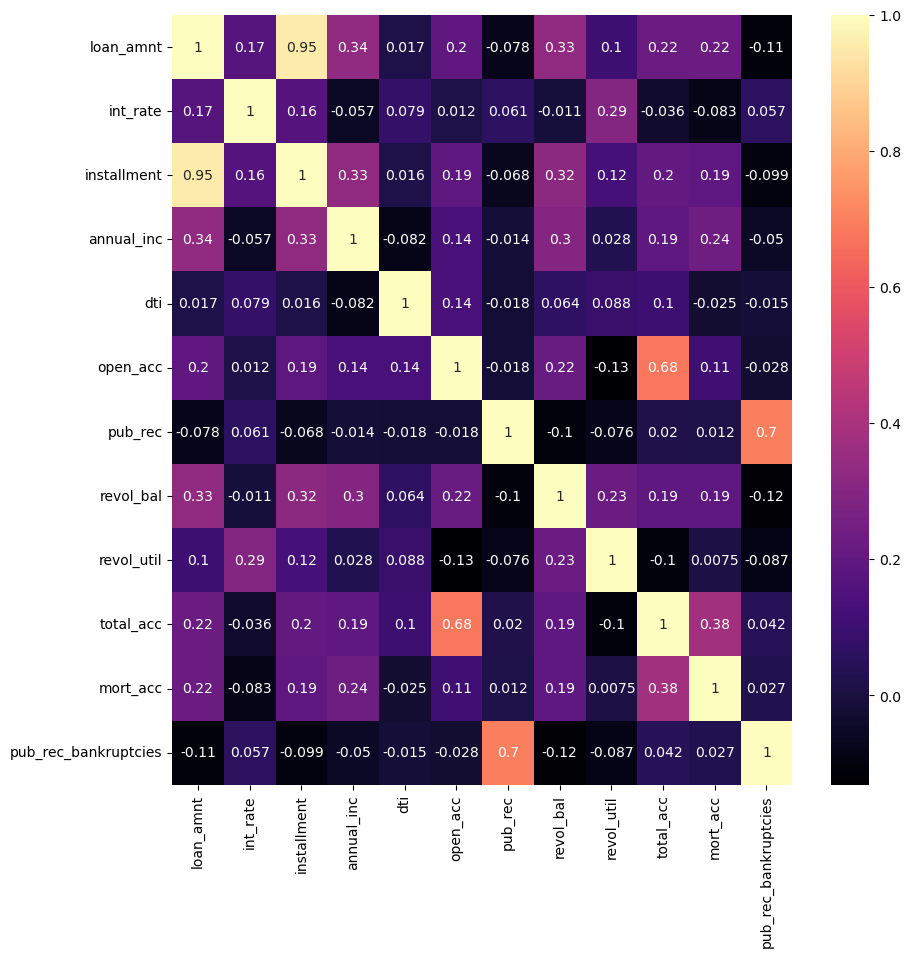

In [14]:

plt.figure(figsize=(10,10))
sns.heatmap(df[y].corr(),cmap='magma',annot=True)


**Because of the almost perfect correlation with the "installment" feature. Exploring this feature further and printing out their descriptions, from the function that was created at the begining of this notebook and performing a scatterplot between them.**

In [15]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [16]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


<Axes: xlabel='installment', ylabel='loan_amnt'>

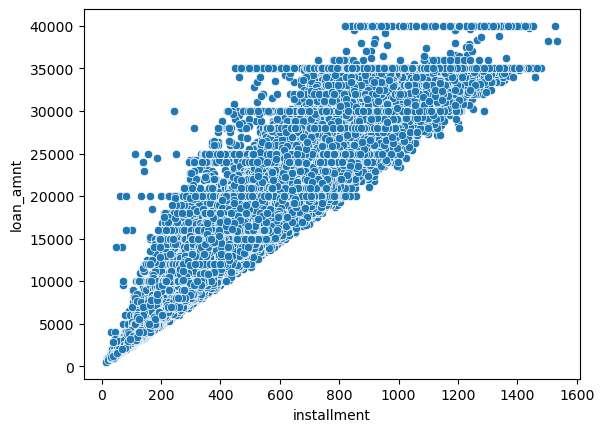

In [17]:
sns.scatterplot(df,x='installment',y ='loan_amnt')

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

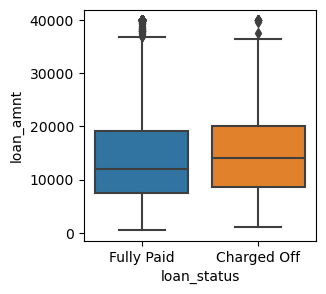

In [18]:
plt.figure(figsize=(3,3))
sns.boxplot(df,x='loan_status',y='loan_amnt')

**Calculating the summary statistics for the loan amount, grouped by the loan_status.**

In [19]:
df[['loan_status','loan_amnt']].groupby('loan_status').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**We begin exploring the Grade and SubGrade columns that LendingClub attributes to the loans. And finding the unique possible grades and subgrades**

In [20]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [21]:
df['grade']

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [22]:
sorted(df['sub_grade'].unique())

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

**Creating a countplot per grade. Setting the hue to the loan_status label.**

<Axes: xlabel='grade', ylabel='count'>

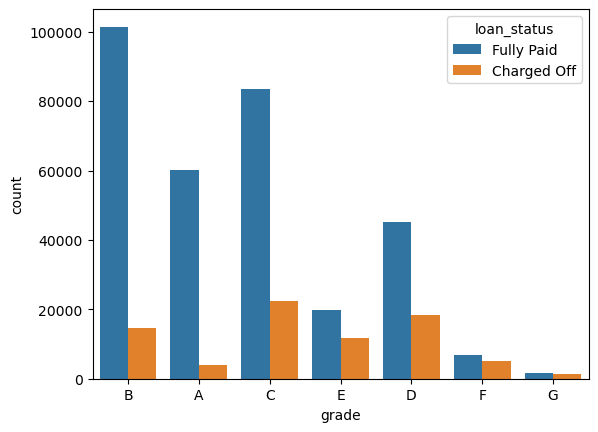

In [23]:
sns.countplot(df,x='grade',hue='loan_status')

**Displaying a count plot per subgrade. After creating this plot, we create a similar plot, but setting hue="loan_status"**

<Axes: ylabel='count'>

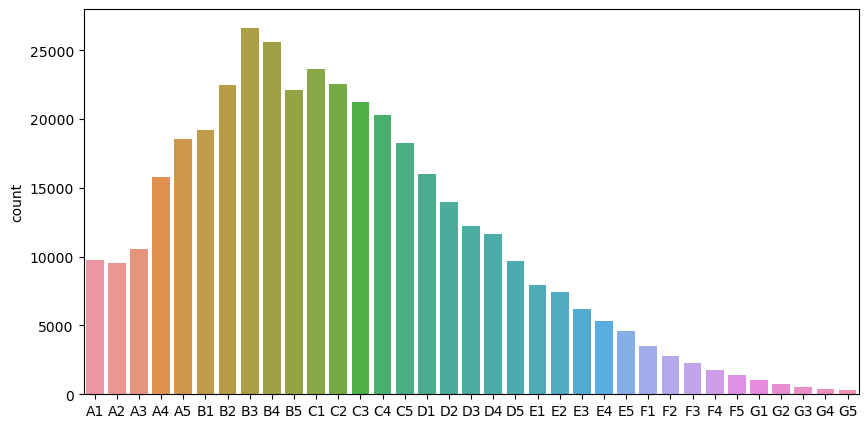

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(df,x=sorted(df['sub_grade']))

<Axes: ylabel='count'>

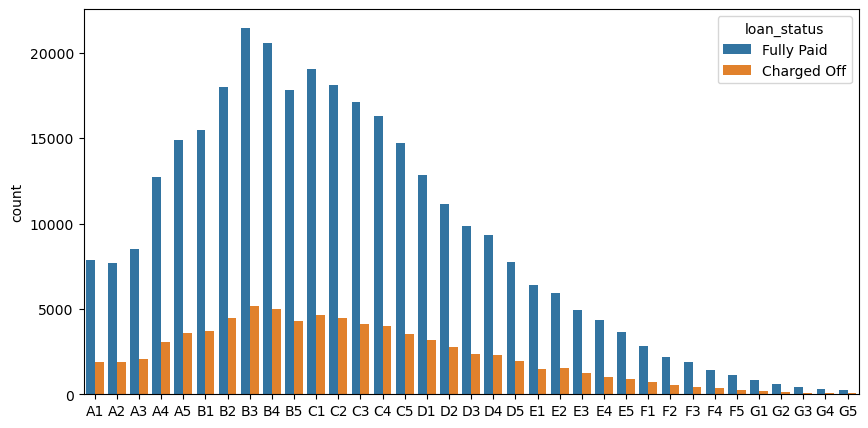

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(df,x=sorted(df['sub_grade']),hue='loan_status')

**Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".**

In [26]:
def paid(x):
    if x == 'Fully Paid':
        return 1
    else:
        return 0
df['loan_repaid']= df['loan_status'].apply(paid)

In [99]:
df[['loan_status','loan_repaid']]

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0
...,...,...
396025,Fully Paid,1
396026,Fully Paid,1
396027,Fully Paid,1
396028,Fully Paid,1


**Creating a bar plot showing the correlation of the numeric features to the new loan_repaid column.**

<Axes: >

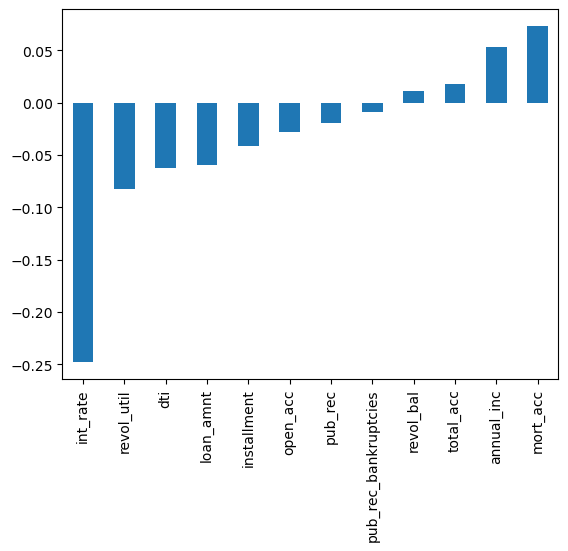

In [100]:
y.append('loan_repaid')
df[y].corr()['loan_repaid'].sort_values(ascending=True).drop('loan_repaid').plot(kind='bar')

---
---
# Data PreProcessing

**Removing or filling any missing data. Removing unnecessary or repetitive features. Converting categorical string features to dummy variables.**



**Missing Data**

**Exploring the missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

**Getting the Length of the Dataframe**

In [101]:
df.shape[0]

396030

**Creating a Series that displays the total count of missing values per column.**

In [102]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Converting this Series to be in term of percentage of the total DataFrame**

In [103]:
df.isnull().sum().apply(lambda x: x*100/396030)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

**Examining the emp_title and emp_length to see whether it will be okay to drop them. Printing out their feature information using the feat_info() function from the top of this notebook.**

In [104]:
feat_info('emp_title')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**Getting the number of unique employment job titles in the Dataframe**

In [105]:
df['emp_title'].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. We remove the emp_title column.**

In [106]:
df.drop('emp_title',axis=1, inplace=True)

**Creating a count plot of the emp_length feature column.**

In [107]:
sorted(df['emp_length'].dropna().unique())
emp_sorted=sorted(df['emp_length'].dropna().unique())


<Axes: xlabel='emp_length', ylabel='count'>

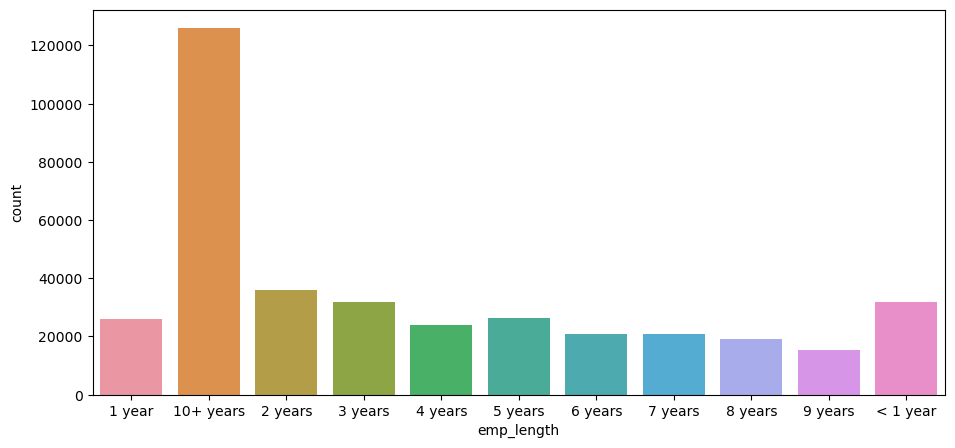

In [108]:
plt.figure(figsize=(11,5))
sns.countplot(df, x='emp_length',order=emp_sorted)

**Plotting out the countplot with a hue separating Fully Paid vs Charged Off**

<Axes: xlabel='emp_length', ylabel='count'>

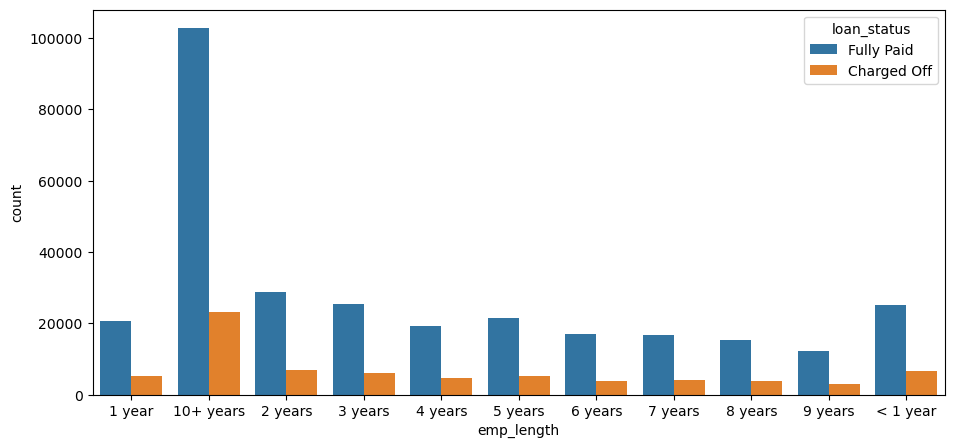

In [109]:
plt.figure(figsize=(11,5))
sns.countplot(df, x='emp_length',order=emp_sorted, hue='loan_status')


**Creating a Series with the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [110]:
emp_total = df['emp_length'].value_counts()
emp_num = df[(df['loan_status']=='Charged Off')]['emp_length'].value_counts()

emp_per = emp_num / emp_total

In [111]:
emp_per

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: count, dtype: float64

<Axes: xlabel='emp_length'>

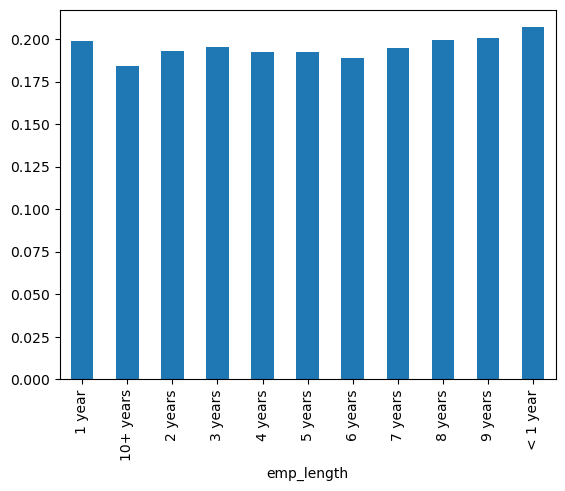

In [112]:
emp_per.plot(kind='bar')

**Charge off rates are extremely similar across all employment lengths. Dropping the emp_length column.**

In [113]:
df.drop('emp_length',axis=1,inplace=True)

**Checking the DataFrame to see what feature columns still have missing data.**

In [114]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

**Reviewing the title column vs the purpose column to check if there is repeated information**

In [115]:
df['purpose'].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [116]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

**The title column is simply a string subcategory/description of the purpose column. We drop the title column.**

In [117]:
df.drop('title',axis=1,inplace=True)

**Finding out what the mort_acc feature represents**

In [118]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [119]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

**Reviewing the other columns to see which most highly correlates to mort_acc**

In [120]:
x=[c for c in df.columns if isinstance(df[c][0], float) or isinstance(df[c][0], int)]
df[x].corr()['mort_acc']

loan_amnt               0.222315
int_rate               -0.082583
installment             0.193694
annual_inc              0.236320
dti                    -0.025439
open_acc                0.109205
pub_rec                 0.011552
revol_bal               0.194925
revol_util              0.007514
total_acc               0.381072
mort_acc                1.000000
pub_rec_bankruptcies    0.027239
Name: mort_acc, dtype: float64

**The total_acc feature correlates with the mort_acc. We group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [121]:

df[['total_acc','mort_acc']].groupby('total_acc').mean()

,mort_acc
total_acc,
2.0,0.000000
3.0,0.052023
4.0,0.066743
5.0,0.103289
6.0,0.151293
...,...
124.0,1.000000
129.0,1.000000
135.0,3.000000


**Filling in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above.**

In [122]:
   total_acc_avg = df[['total_acc','mort_acc']].groupby('total_acc').mean()['mort_acc']

In [123]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [124]:
df['mort_acc']= df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [125]:
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Removing the rows that are missing those values in those columns with dropna().**

In [126]:
df.dropna(inplace=True)

In [127]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

### Categorical Variables and Dummy Variables

**Dealing with the string values due to the categorical columns.**

**Listing all the columns that are currently non-numeric.**

In [128]:
z=[c for c in df.columns if isinstance(df[c].head(1)[0], str)]
z

['term',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'earliest_cr_line',
 'initial_list_status',
 'application_type',
 'address']

---
**Going through all the string features to see what we should do with them.**

---
### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type**

In [129]:
df['term']= df['term'].map({' 36 months':36,' 60 months':60})

In [130]:
df['term']

0         36
1         36
2         36
3         36
4         60
          ..
396025    60
396026    36
396027    36
396028    60
396029    36
Name: term, Length: 395219, dtype: int64

### grade feature

**Already knowing grade is part of sub_grade, the grade feature is dropped.**

In [131]:
df.drop('grade',axis=1,inplace=True)

**Converting the subgrade into dummy variables. Then concatenating these new columns to the original dataframe. And dropping the original subgrade column.**

In [132]:
sub=pd.get_dummies(df['sub_grade'],drop_first=True,dtype=float)


In [133]:
df=pd.concat([df,sub],axis=1)

In [134]:
df.drop('sub_grade',inplace=True,axis=1)

In [135]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'mort_acc', 'pub_rec_bankruptcies', 'address',
       'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5',
       'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4',
       'G5'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Converting these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenating them with the original dataframe. And dropping the original columns.**

In [136]:
st=['verification_status', 'application_type','initial_list_status','purpose']
for x in st:
    p=pd.get_dummies(df[x],drop_first=True,dtype=float)
    df=pd.concat([df,p],axis=1)
    df.drop(x,axis=1,inplace=True)

In [137]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'home_ownership',
       'annual_inc', 'issue_d', 'loan_status', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'loan_repaid', 'A2',
       'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4',
       'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1',
       'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5', 'Source Verified',
       'Verified', 'INDIVIDUAL', 'JOINT', 'w', 'credit_card',
       'debt_consolidation', 'educational', 'home_improvement', 'house',
       'major_purchase', 'medical', 'moving', 'other', 'renewable_energy',
       'small_business', 'vacation', 'wedding'],
      dtype='object')

### home_ownership
**Reviewing the value_counts for the home_ownership column.**

In [138]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

**Converting home categories to dummy variables, but replacing NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenating them with the original dataframe. And dropping the original columns.**

In [139]:
def home(x):
    if x=='ANY' or x=='NONE' or x=='OTHER':
        return 'OTHER'
    else:
        return x
df['home_ownership']=df['home_ownership'].apply(home)

In [181]:
home=pd.get_dummies(df['home_ownership'],drop_first=True,dtype=float)
df=pd.concat([df,home],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

### address
**Feature engineering a zip code column from the address in the data set. Creating a column called 'zip_code' that extracts the zip code from the address column.**

In [150]:
df['zip_code'] = df['address'].apply(lambda x: x.split(' ')[-1])

In [151]:
df['zip_code']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip_code, Length: 395219, dtype: object

**Making zip_code column into dummy variables using pandas. Concatenating the result and dropping the original zip_code column along with dropping the address column.**

In [152]:
zipc=pd.get_dummies(df['zip_code'],drop_first=True,dtype=float)
df=pd.concat([df,zipc],axis=1)
df.drop(['zip_code','address'],axis=1,inplace=True)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date. This feature will have to be dropped.**

In [154]:
df.drop('issue_d',axis=1,inplace=True)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extracting the year from this feature, then converting it to a numeric feature. And setting this new data to a feature column called 'earliest_cr_year'.Then dropping the earliest_cr_line feature.**

In [167]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[-1]))


In [169]:
 df.drop('earliest_cr_line',axis=1,inplace=True)

## Train Test Split

**Importing train_test_split from sklearn.**

In [170]:
from sklearn.model_selection import train_test_split

**Dropping the load_status column that we created earlier, since its a duplicate of the loan_repaid column. We use the loan_repaid column since its already in 0s and 1s.**

In [171]:
df.drop('loan_status',axis=1,inplace=True)

In [182]:
df

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,29597,30723,48052,70466,86630,93700,earliest_cr_year,OTHER,OWN,RENT
204901,14800.0,36,18.49,538.71,104540.0,13.12,10.0,0.0,21241.0,60.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1992,0.0,0.0,1.0
226870,31000.0,60,17.57,779.97,122000.0,27.46,20.0,0.0,36941.0,55.1,...,1.0,0.0,0.0,0.0,0.0,0.0,1996,0.0,0.0,0.0
241733,22000.0,60,7.89,444.93,71400.0,21.29,9.0,0.0,5212.0,41.7,...,0.0,0.0,0.0,0.0,0.0,0.0,2003,0.0,0.0,1.0
225481,20000.0,36,10.78,652.70,100000.0,17.86,14.0,0.0,11139.0,38.9,...,0.0,0.0,0.0,0.0,0.0,0.0,1994,0.0,0.0,0.0
104657,18625.0,60,17.57,468.61,41500.0,18.80,20.0,0.0,27975.0,38.9,...,1.0,0.0,0.0,0.0,0.0,0.0,1993,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325989,24000.0,36,6.97,740.73,180000.0,2.65,10.0,0.0,4604.0,8.5,...,0.0,0.0,0.0,1.0,0.0,0.0,1984,0.0,0.0,0.0
123186,12800.0,36,14.47,440.41,62000.0,20.54,10.0,0.0,16704.0,91.3,...,0.0,1.0,0.0,0.0,0.0,0.0,2001,0.0,0.0,0.0
33157,16200.0,60,20.75,435.99,45000.0,26.51,19.0,1.0,9410.0,57.7,...,0.0,0.0,0.0,1.0,0.0,0.0,2002,0.0,1.0,0.0
232425,21000.0,60,20.99,568.01,98000.0,17.63,14.0,0.0,34456.0,83.4,...,0.0,0.0,0.0,0.0,0.0,0.0,2000,0.0,0.0,1.0


**Setting X and y variables to the .values of the features and label.**

In [183]:
X= df.drop('loan_repaid',axis=1)
y= df['loan_repaid']



----
----

In [184]:
df = df.sample(frac=0.1,random_state=101)
print(len(df))

3952


**Performing a train/test split with test_size=0.2 and a random_state of 101.**

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

**Using a MinMaxScaler to normalize the feature data X_train and X_test. To avoid data leakge from the test set, X_train data is only fitted.**

In [186]:
from sklearn.preprocessing import MinMaxScaler

In [187]:
scaler= MinMaxScaler()

In [188]:
scaler.fit(X_train)

MinMaxScaler()

In [189]:
X_train=scaler.transform(X_train)
X_test= scaler.transform(X_test)

# Creating the Model

**importing the necessary Keras functions.**

In [203]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

**Building a sequential model to will be trained on the data.**

In [204]:
model = Sequential()
model.add(Dense(78,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

**Fitting the model to the training data for at least 25 epochs. Also adding in the validation data for later plotting.**

In [205]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [206]:
model.fit(x=X_train,y=y_train, epochs=25,validation_data=(X_test,y_test), callbacks=[early_stop],batch_size=256)

Epoch 1/25
124/124 [==============================] - 2s 6ms/step - loss: 0.4771 - val_loss: 0.3431
Epoch 2/25
124/124 [==============================] - 1s 6ms/step - loss: 0.3292 - val_loss: 0.2898
Epoch 3/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2937 - val_loss: 0.2802
Epoch 4/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2816 - val_loss: 0.2767
Epoch 5/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2765 - val_loss: 0.2743
Epoch 6/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2740 - val_loss: 0.2732
Epoch 7/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2711 - val_loss: 0.2730
Epoch 8/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2676 - val_loss: 0.2720
Epoch 9/25
124/124 [==============================] - 1s 5ms/step - loss: 0.2665 - val_loss: 0.2719
Epoch 10/25
124/124 [==============================] - 1s 4ms/step - loss: 0.2651 - val_loss: 0.2707

**Saving the model.**

In [207]:
model.save('loan_prediction.h5')

C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Evaluating Model Performance.

**Plotting out the validation loss versus the training loss.**

In [208]:
losses= pd.DataFrame(model.history.history)

<Axes: >

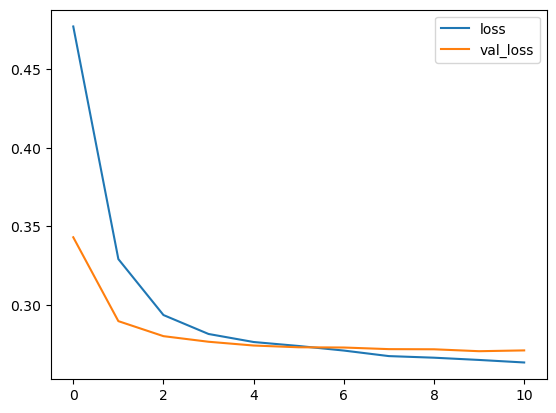

In [209]:
losses.plot()

**Creating predictions from the X_test set and displaying a classification report and confusion matrix for the X_test set.**

In [211]:
from sklearn.metrics import classification_report, confusion_matrix

In [212]:
y_pred=model.predict(X_test)


248/248 [==============================] - 1s 2ms/step


In [222]:
y_pred=np.rint(y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.43      0.60      1570
           1       0.88      0.99      0.93      6335

    accuracy                           0.88      7905
   macro avg       0.91      0.71      0.76      7905
weighted avg       0.89      0.88      0.86      7905



In [224]:
print(confusion_matrix(y_test,y_pred))

[[ 681  889]
 [  38 6297]]


**Predicting if a random customer should be given a loan or not**

In [230]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer =[new_customer]

In [231]:
new_customer=scaler.transform(new_customer)
model.predict(new_customer)

1/1 [==============================] - 0s 38ms/step


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.8531671]], dtype=float32)

**To check if the person actually paid back the loan**

In [232]:
df['loan_repaid'].iloc[random_ind]

1